In [1]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import label_binarize, LabelEncoder
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16, preprocess_input as vgg16_preprocess_input
import joblib



2024-03-16 11:10:05.419452: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 11:10:05.419605: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 11:10:05.549229: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
main_folder_path = '/kaggle/input/citrus-disease-images-dataset'
class_folders = os.listdir(main_folder_path)


In [3]:
# Create variables to store features for the VGG16 model
vgg16_X_train, vgg16_X_test = [], []
y_train, y_test = [], []


In [4]:
# Define VGG16 model and preprocess_input function
vgg16_model = VGG16(weights='imagenet', include_top=False)
vgg16_preprocess_input_func = vgg16_preprocess_input


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
# Feature extraction function for VGG16
def extract_vgg16_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = vgg16_preprocess_input_func(x)
    features = vgg16_model.predict(x)
    return features.flatten()


In [ ]:
# Iterate through subfolders (classes)
for class_folder in class_folders:
    class_folder_path = os.path.join(main_folder_path, class_folder)

    # Check if it's a directory
    if os.path.isdir(class_folder_path):
        # Split the images into training (70%) and testing (30%)
        class_images = [file_name for file_name in os.listdir(class_folder_path) if file_name.lower().endswith(('.png', '.jpg', '.jpeg'))]
        class_X_train, class_X_test = train_test_split(class_images, test_size=0.3, random_state=42)

        # Iterate through images in the subfolder for training
        for file_name in class_X_train:
            img_path = os.path.join(class_folder_path, file_name)
            vgg16_features = extract_vgg16_features(img_path)
            vgg16_X_train.append(vgg16_features)
            y_train.append(class_folder)

        # Iterate through images in the subfolder for testing
        for file_name in class_X_test:
            img_path = os.path.join(class_folder_path, file_name)
            vgg16_features = extract_vgg16_features(img_path)
            vgg16_X_test.append(vgg16_features)
            y_test.append(class_folder)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


I0000 00:00:1710587424.223916     107 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━

In [ ]:
# Convert labels to numeric using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)


In [ ]:
# Convert lists to numpy arrays
vgg16_X_train = np.array(vgg16_X_train)
vgg16_X_test = np.array(vgg16_X_test)


In [ ]:
# Create and train the SVM classifier
svm_classifier = SVC(kernel='linear', probability=True)
svm_classifier.fit(vgg16_X_train, y_train)


In [ ]:
# Use the trained SVM classifier to make predictions
svm_y_train_pred = svm_classifier.predict(vgg16_X_train)
svm_y_pred = svm_classifier.predict(vgg16_X_test)

# Calculate Accuracy
train_accuracy = accuracy_score(y_train, svm_y_train_pred)
test_accuracy = accuracy_score(y_test, svm_y_pred)


In [15]:
# Print Accuracy
print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Testing Accuracy: 0.9831932773109243


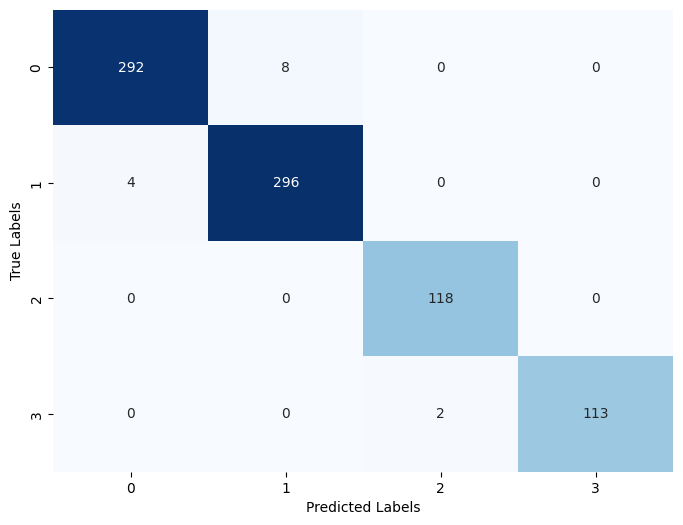

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
    # Confusion Matrix
conf_matrix = confusion_matrix(y_test, svm_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
#     plt.title(f'Confusion Matrix ({model_name})')
plt.show()

In [ ]:
svm_model_path = '/kaggle/working/svm_model1.pkl'
joblib.dump(svm_classifier, svm_model_path)